In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('classify_3.csv',encoding="gbk")

In [3]:
print(data)

           date   time    日前电价     直调负荷  联络线受电负荷      风电负荷  光伏总加  自备机组总加  \
0      2022/1/1   0:15  279.00  60624.3  10030.0   8817.99   0.0    4815   
1      2022/1/1   0:30  277.00  60527.7   9443.0   8895.40   0.0    4815   
2      2022/1/1   0:45  277.40  59883.2   9206.0   8969.26   0.0    4815   
3      2022/1/1   1:00  276.00  59625.4   8969.0   9038.97   0.0    4815   
4      2022/1/1   1:15  275.00  59367.6   8732.0   9104.96   0.0    4815   
...         ...    ...     ...      ...      ...       ...   ...     ...   
7963  2022/3/24  23:00  506.40  55543.4  11099.0  10706.40   0.0    4765   
7964  2022/3/24  23:15  540.48  55244.2  10577.0  10494.50   0.0    4765   
7965  2022/3/24  23:30  558.02  55193.1  10257.0  10288.60   0.0    4765   
7966  2022/3/24  23:45  548.20  54702.6  10193.0  10074.40   0.0    4765   
7967  2022/3/24   0:00  536.04  54177.0  10131.0   9873.44   0.0    4765   

      地方电厂发电总加      直调公用      正备用      负备用  quarter  
0         8140  36961.31  18392.6

In [4]:
f1 = data['日前电价']
f2 = data['直调负荷']
f3 = data['联络线受电负荷']
f4 = data['风电负荷']
f5 = data['光伏总加']
f6 = data['直调公用']
f7 = data['正备用']
f8 = data['负备用']
f9 = data['quarter']

In [5]:
print(f1)

0       279.00
1       277.00
2       277.40
3       276.00
4       275.00
         ...  
7963    506.40
7964    540.48
7965    558.02
7966    548.20
7967    536.04
Name: 日前电价, Length: 7968, dtype: float64


In [6]:
length=len(f1)#给定变量值
lookBack = 7*96
pred_num = 1
train_num = length-lookBack-pred_num+1
train_size = 62*96
valid_size = 10*96
test_size = 4*96
size=train_size+valid_size

In [7]:
def createSamples_X(dataset, lookBack, pred_num,day):#取前n天对应点的电价数据
    dataX = np.zeros((1,day)) 
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample = []
        for j in range(day):
            sample_X = dataset[(i+j*96):(i+j*96+1), :]
            sample.append(sample_X)
        sample = np.array(sample).reshape(1,-1)
        dataX = np.vstack((dataX,sample)) 
    dataX = dataX[1:(len(dataset)-lookBack-pred_num+2), :]
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1])) #三维到二维
    return dataX

In [8]:
#取目标值Y或取当点特征
def createSamples_Y(dataset, lookBack, pred_num):
    dataY = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_Y = dataset[(i+lookBack):(i + lookBack+pred_num), :]
        dataY.append(sample_Y)
    dataY = np.array(dataY)  # (N, 1)
    dataY = np.reshape(dataY, (dataY.shape[0], dataY.shape[1]))
    return dataY

In [9]:
#取连续特征值
def createSamples_continuous(dataset, lookBack, pred_num,front, lenthh):
    dataX = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_X = dataset[(i+front):(i+front+lenthh), :]
        dataX.append(sample_X)
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1]))
    return dataX

In [10]:
#划分特征与目标
traffic_target = createSamples_Y(f1.values.reshape(-1, 1), lookBack, pred_num)
traffic_feature_2 = createSamples_Y(f2.values.reshape(-1, 1),lookBack, pred_num) 
traffic_feature_3 = createSamples_Y(f3.values.reshape(-1, 1),lookBack, pred_num)
traffic_feature_4 = createSamples_continuous(f4.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17) 
traffic_feature_5 = createSamples_continuous(f5.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)  
traffic_feature_6 = createSamples_continuous(f6.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_7 = createSamples_continuous(f7.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_8 = createSamples_continuous(f8.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_9 = createSamples_Y(f9.values.reshape(-1, 1),lookBack, pred_num)

traffic_feature_1 = createSamples_X(f1.values.reshape(-1, 1),lookBack, pred_num,6)
traffic_feature_10 = createSamples_continuous(f1.values.reshape(-1, 1),lookBack, pred_num,lookBack-16-96*3,17) 



traffic_feature = np.hstack((traffic_feature_1,traffic_feature_2,traffic_feature_3,traffic_feature_4,
                             traffic_feature_5,traffic_feature_6,traffic_feature_7,traffic_feature_8,
                             traffic_feature_9,traffic_feature_10                          
                            ))


In [11]:
#训练、验证、测试集
y_train = traffic_target[0:train_size,:]
y_valid = traffic_target[train_size:size,:]
y_test = traffic_target[size:train_num,:]
X_train=traffic_feature[0:train_size,:]
X_valid=traffic_feature[train_size:size,:]
X_test=traffic_feature[size:train_num,:]

y_train,y_valid,y_test,X_train,X_valid,X_test

(array([[311.  ],
        [294.  ],
        [277.38],
        ...,
        [682.56],
        [666.8 ],
        [649.56]]),
 array([[324.89],
        [327.51],
        [330.  ],
        [329.24],
        [330.55],
        [330.72],
        [330.49],
        [329.55],
        [330.  ],
        [328.95],
        [329.13],
        [327.72],
        [326.91],
        [326.91],
        [325.98],
        [325.03],
        [327.47],
        [328.98],
        [330.68],
        [333.76],
        [340.9 ],
        [351.22],
        [378.  ],
        [382.4 ],
        [382.  ],
        [404.63],
        [439.15],
        [388.22],
        [338.98],
        [333.59],
        [332.6 ],
        [326.72],
        [326.69],
        [317.49],
        [308.07],
        [300.34],
        [282.  ],
        [220.  ],
        [173.  ],
        [139.  ],
        [113.  ],
        [ 95.34],
        [ 70.57],
        [ 68.59],
        [ 88.36],
        [ 70.  ],
        [-80.  ],
        [-80.  ],
        [-80.

In [12]:
print(y_test)

[[390.5 ]
 [386.4 ]
 [381.67]
 [378.  ]
 [372.74]
 [371.32]
 [366.  ]
 [359.  ]
 [357.68]
 [353.4 ]
 [350.6 ]
 [351.52]
 [351.06]
 [347.02]
 [348.3 ]
 [346.8 ]
 [345.83]
 [352.  ]
 [363.2 ]
 [361.68]
 [375.32]
 [386.4 ]
 [406.  ]
 [414.  ]
 [441.8 ]
 [466.4 ]
 [490.  ]
 [442.  ]
 [443.08]
 [454.65]
 [477.48]
 [510.6 ]
 [547.44]
 [538.64]
 [506.8 ]
 [474.92]
 [449.6 ]
 [434.  ]
 [417.76]
 [408.  ]
 [404.  ]
 [410.  ]
 [407.86]
 [412.  ]
 [416.  ]
 [392.4 ]
 [363.4 ]
 [301.48]
 [283.8 ]
 [265.64]
 [277.88]
 [291.8 ]
 [330.92]
 [338.72]
 [339.52]
 [332.4 ]
 [322.98]
 [313.5 ]
 [312.7 ]
 [312.18]
 [342.5 ]
 [364.8 ]
 [382.83]
 [404.44]
 [414.  ]
 [422.  ]
 [428.  ]
 [424.44]
 [444.36]
 [476.  ]
 [514.6 ]
 [564.4 ]
 [604.  ]
 [673.  ]
 [616.6 ]
 [562.4 ]
 [540.3 ]
 [528.44]
 [522.  ]
 [510.6 ]
 [546.36]
 [564.2 ]
 [585.6 ]
 [607.44]
 [585.  ]
 [544.04]
 [505.88]
 [468.2 ]
 [460.  ]
 [460.  ]
 [455.56]
 [460.6 ]
 [480.8 ]
 [478.86]
 [457.  ]
 [437.52]
 [494.14]
 [509.92]
 [511.8 ]
 [520.  ]


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import   GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
criterion=['mae','squared_error'] #决策树属性['gini','entropy'],squared_error,squared_error
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}


In [15]:
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                              n_iter = 10,  
                              cv = 3, verbose=2, random_state=42, n_jobs=1)

In [16]:
clf_random.fit(X_train,y_train)#bootstrap=False, criterion=squared_error, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, criterion=squared_error, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 1.0min


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [17]:
rf=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10,n_estimators=1200,min_samples_leaf=2)
rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
print(y_train_pred)

<ipython-input-17-75a4ea1f350a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[308.02448561 295.53381886 280.16062581 ... 653.62829454 653.59306804
 641.41249918]


In [20]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,y_train))
print ('均方差',mean_squared_error(y_train,y_train_pred))
print ('绝对差',mean_absolute_error(y_train,y_train_pred))
print ('解释度',explained_variance_score(y_train,y_train_pred))

决策树模型评估--训练集：
训练r^2: 0.9965945226730435
均方差 195.09805587528118
绝对差 8.32229959292461
解释度 0.9965945226730435


In [21]:
print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,y_test))
print ('均方差',mean_squared_error(y_test,y_test_pred))
print ('绝对差',mean_absolute_error(y_test,y_test_pred))
print ('解释度',explained_variance_score(y_test,y_test_pred))

决策树模型评估--验证集：
验证r^2: 0.5593278440148293
均方差 15804.053503339177
绝对差 98.18711531578576
解释度 0.7551036242092746


In [22]:
y_pred = rf.predict(X_test)

In [23]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')
acc=test0['日前电价']

In [24]:
print( r2_score(acc, y_pred))

0.5593278440148293


In [25]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ('均方差',mean_squared_error(acc,y_pred))
print ('绝对差',mean_absolute_error(acc,y_pred))
print ('解释度',explained_variance_score(acc,y_pred))

均方差 15804.053503339177
绝对差 98.18711531578576
解释度 0.7551036242092746


In [26]:
mape=np.abs((acc-y_pred)/((acc+y_pred)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.4132617585200749


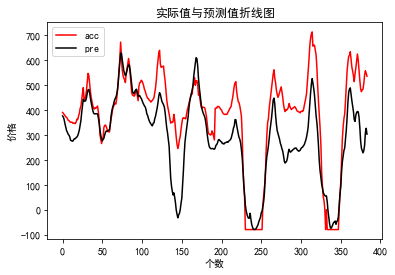

In [30]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(y_pred,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show()

In [13]:
import xgboost as xgb
from sklearn.metrics import r2_score, auc
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#acc=y_test['f1']
#print( r2_score(acc, y_pred) )
print(y_pred)

[ 413.71304    383.35922    362.39447    323.33405    320.69946
  325.13977    310.5226     302.69882    278.53256    267.9476
  267.4799     267.7049     261.5823     250.62979    257.87595
  260.63498    266.22955    257.4146     263.0433     258.16867
  313.29495    317.8178     392.5058     391.29645    422.2074
  443.2212     469.89462    433.528      437.19696    439.0809
  446.18744    482.51788    499.40796    502.33365    512.0041
  491.9839     476.76993    452.72256    397.25705    399.30167
  404.0579     391.71487    396.97324    390.70953    384.25888
  371.58328    341.86417    302.64734    306.941      335.4297
  320.50037    303.04852    299.66602    298.65494    308.40833
  306.5978     331.8609     340.72528    335.31134    342.27637
  335.25735    391.5882     417.82144    421.6382     413.40204
  433.79013    432.72247    467.09796    480.56927    523.936
  593.45294    602.0052     639.18665    639.0274     618.60345
  580.58734    574.4486     540.2146     536.89

In [14]:
print(X_test)

[[516.   230.64 672.34 ... 659.   634.44 464.  ]
 [520.04 209.   735.4  ... 634.44 464.   442.  ]
 [504.   197.96 754.   ... 464.   442.   430.  ]
 ...
 [693.28 412.52 674.64 ... 460.6  480.8  478.86]
 [659.   396.   664.   ... 480.8  478.86 457.  ]
 [634.44 377.24 642.8  ... 478.86 457.   437.52]]


In [15]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')

acc=test0['日前电价']

In [16]:
print( r2_score(acc, y_pred))

0.5812412845285795


In [17]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ('均方差',mean_squared_error(acc,y_pred))
print ('绝对差',mean_absolute_error(acc,y_pred))
print ('解释度',explained_variance_score(acc,y_pred))

均方差 15018.160449698631
绝对差 95.91865214323006
解释度 0.7369594692440808


In [18]:
mape=np.abs((acc-y_pred)/((acc+y_pred)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.8726169408579038


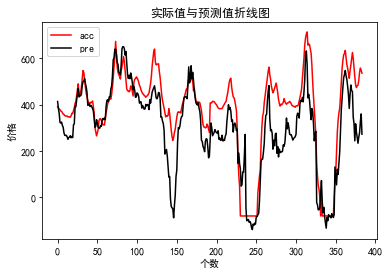

In [19]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#y_pred 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(y_pred,color=(0,0,0),label="pre") 
plt.xlabel("个数") 
plt.ylabel("价格") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [20]:
result=list(y_pred)
result=list(map(lambda x: x + 1, result))
test0["日前电价"]=result
test0.to_csv("pre_xgb.csv", index=False)

In [21]:
print(y_train)

[[311.  ]
 [294.  ]
 [277.38]
 ...
 [682.56]
 [666.8 ]
 [649.56]]


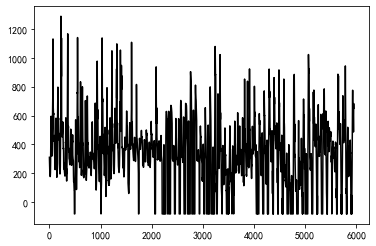

In [22]:
plt.plot(y_train,color=(0,0,0),label="y_train")

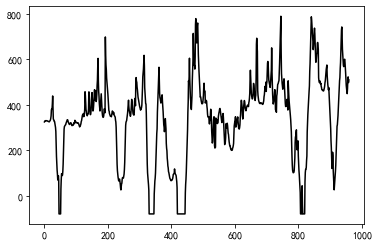

In [23]:
plt.plot(y_valid,color=(0,0,0),label="y_valid")#y_test

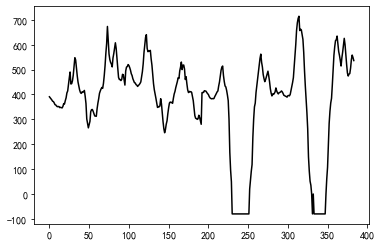

In [24]:
plt.plot(y_test,color=(0,0,0),label="y_test")#X_test,X_valid

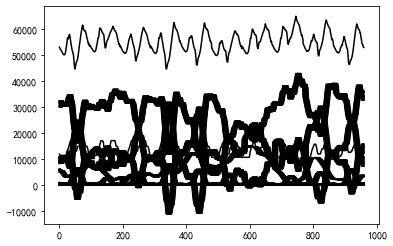

In [25]:
plt.plot(X_valid,color=(0,0,0),label="X_valid")

In [31]:
print(y_train)

[[311.  ]
 [294.  ]
 [277.38]
 ...
 [682.56]
 [666.8 ]
 [649.56]]


In [35]:
a=len(X_test)
print(a)

384


In [36]:
print(y_valid)

[[324.89]
 [327.51]
 [330.  ]
 [329.24]
 [330.55]
 [330.72]
 [330.49]
 [329.55]
 [330.  ]
 [328.95]
 [329.13]
 [327.72]
 [326.91]
 [326.91]
 [325.98]
 [325.03]
 [327.47]
 [328.98]
 [330.68]
 [333.76]
 [340.9 ]
 [351.22]
 [378.  ]
 [382.4 ]
 [382.  ]
 [404.63]
 [439.15]
 [388.22]
 [338.98]
 [333.59]
 [332.6 ]
 [326.72]
 [326.69]
 [317.49]
 [308.07]
 [300.34]
 [282.  ]
 [220.  ]
 [173.  ]
 [139.  ]
 [113.  ]
 [ 95.34]
 [ 70.57]
 [ 68.59]
 [ 88.36]
 [ 70.  ]
 [-80.  ]
 [-80.  ]
 [-80.  ]
 [-80.  ]
 [-80.  ]
 [-80.  ]
 [ 29.83]
 [ 70.91]
 [ 97.  ]
 [ 95.  ]
 [ 88.7 ]
 [ 90.82]
 [108.2 ]
 [139.  ]
 [187.83]
 [238.2 ]
 [293.18]
 [304.39]
 [307.31]
 [309.44]
 [311.7 ]
 [312.4 ]
 [318.66]
 [322.2 ]
 [326.16]
 [330.22]
 [334.35]
 [334.45]
 [330.68]
 [324.46]
 [321.07]
 [317.87]
 [315.1 ]
 [313.53]
 [315.1 ]
 [318.24]
 [321.14]
 [321.45]
 [319.99]
 [315.43]
 [310.71]
 [308.64]
 [309.81]
 [309.8 ]
 [309.82]
 [311.3 ]
 [317.85]
 [321.63]
 [319.23]
 [317.28]
 [332.03]
 [328.77]
 [327.72]
 [325.13]
